In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배 효과_naver_blog_953.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
data = f.read()
f.close()

In [3]:
data=data.replace('\n','')
for i in range(1,953):
    x="naver_blog_"+str(i)
    data=data.replace(x,"\n\n"+x+"  "+"\n")
f = open('전자담배 효과_naver_blog_953.txt', 'w', encoding='utf-8')
f.write(data)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
openFileName = '전자담배 효과_naver_blog_953.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
result = f.read()
f.close()

In [5]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(result)

In [6]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [7]:
print(X)

  (0, 10574)	1
  (1, 14360)	1
  (2, 4281)	1
  (3, 5912)	1
  (4, 8595)	1
  (5, 10574)	1
  (6, 7358)	1
  (7, 8156)	1
  (8, 8736)	1
  (9, 13247)	1
  (10, 9709)	1
  (11, 1970)	1
  (12, 10236)	1
  (13, 14156)	1
  (14, 5673)	1
  (15, 4826)	1
  (16, 8595)	1
  (17, 5969)	1
  (18, 11087)	1
  (19, 11579)	1
  (20, 8595)	1
  (21, 468)	1
  (22, 5235)	1
  (23, 92)	1
  (24, 3205)	1
  :	:
  (236556, 7342)	1
  (236557, 10362)	1
  (236558, 6459)	1
  (236559, 11265)	1
  (236560, 10574)	1
  (236561, 6453)	1
  (236562, 1593)	1
  (236563, 2639)	1
  (236564, 6453)	1
  (236565, 4353)	1
  (236566, 3242)	1
  (236567, 1511)	1
  (236568, 6453)	1
  (236569, 4306)	1
  (236570, 9550)	1
  (236571, 3638)	1
  (236572, 2804)	1
  (236573, 10531)	1
  (236574, 6141)	1
  (236575, 2636)	1
  (236576, 10727)	1
  (236577, 7872)	1
  (236578, 14182)	1
  (236579, 14270)	1
  (236580, 9677)	1


In [8]:
print(vectorize.vocabulary_)

{'전자담배': 10574, '효과': 14360, '무엇': 4281, '사람': 5912, '연초': 8595, '시작': 7358, '얘기': 8156, '오늘': 8736, '포스팅': 13247, '이야기': 9709, '내용': 1970, '작성': 10236, '혹시': 14156, '블로그': 5673, '방문': 4826, '사용': 5969, '주위': 11087, '차라리': 11579, '건강': 468, '보신': 5235, '가요': 92, '또한': 3205, '이제': 9754, '듣기': 3065, '생각': 6268, '대한': 2636, '이유': 9733, '지금': 11265, '우선': 9081, '가장': 106, '기본': 1542, '목적': 4177, '대용': 2582, '해도': 13839, '과언': 970, '사실': 5956, '아시': 7763, '니코틴': 2246, '패치': 13069, '대체': 2610, '수단': 6857, '금연': 1466, '제일': 10847, '전담': 10513, '흡입': 14480, '방식': 4841, '외형': 8955, '심리': 7585, '안정감': 7920, '무화량': 4328, '중독': 11170, '물질': 4397, '때문': 3183, '머리': 3925, '계속': 689, '경우': 649, '여기': 8426, '정말': 10719, '가지': 122, '화학물질': 14253, '발생': 4771, '발암': 4774, '인체': 9903, '여가': 8419, '지나': 11270, '반면': 4688, '과연': 971, '전체': 10596, '비교': 5685, '부재': 5450, '다시': 2306, '불상': 5578, '사가': 5879, '정도': 10709, '결과': 581, '나머지': 1802, '무시': 4275, '영향': 8684, '성분': 6517, '더욱': 2668, '부분': 5405, '이지': 

In [9]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'전자담배': 12249,
 '효과': 1879,
 '무엇': 189,
 '사람': 1012,
 '연초': 1030,
 '시작': 517,
 '얘기': 59,
 '오늘': 603,
 '포스팅': 310,
 '이야기': 244,
 '내용': 226,
 '작성': 54,
 '혹시': 124,
 '블로그': 106,
 '방문': 266,
 '사용': 3505,
 '주위': 106,
 '차라리': 31,
 '건강': 610,
 '보신': 43,
 '가요': 49,
 '또한': 506,
 '이제': 401,
 '듣기': 2,
 '생각': 1445,
 '대한': 560,
 '이유': 377,
 '지금': 457,
 '우선': 141,
 '가장': 699,
 '기본': 210,
 '목적': 96,
 '대용': 16,
 '해도': 140,
 '과언': 9,
 '사실': 465,
 '아시': 49,
 '니코틴': 2271,
 '패치': 191,
 '대체': 140,
 '수단': 63,
 '금연': 3929,
 '제일': 149,
 '전담': 231,
 '흡입': 630,
 '방식': 440,
 '외형': 14,
 '심리': 17,
 '안정감': 7,
 '무화량': 237,
 '중독': 282,
 '물질': 712,
 '때문': 1537,
 '머리': 75,
 '계속': 267,
 '경우': 945,
 '여기': 259,
 '정말': 846,
 '가지': 939,
 '화학물질': 64,
 '발생': 279,
 '발암': 261,
 '인체': 137,
 '여가': 9,
 '지나': 17,
 '반면': 64,
 '과연': 79,
 '전체': 122,
 '비교': 337,
 '부재': 7,
 '다시': 380,
 '불상': 3,
 '사가': 10,
 '정도': 898,
 '결과': 535,
 '나머지': 30,
 '무시': 33,
 '영향': 205,
 '성분': 342,
 '더욱': 234,
 '부분': 807,
 '이지': 40,
 '어째서': 1,
 '정지': 4,
 '면서'

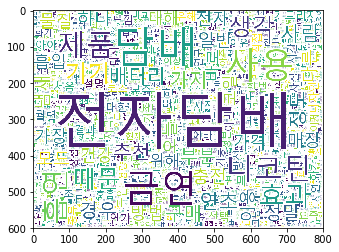

In [12]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [13]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'전자담배': 10574, '효과': 14360, '무엇': 4281, '사람': 5912, '연초': 8595, '시작': 7358, '얘기': 8156, '오늘': 8736, '포스팅': 13247, '이야기': 9709, '내용': 1970, '작성': 10236, '혹시': 14156, '블로그': 5673, '방문': 4826, '사용': 5969, '주위': 11087, '차라리': 11579, '건강': 468, '보신': 5235, '가요': 92, '또한': 3205, '이제': 9754, '듣기': 3065, '생각': 6268, '대한': 2636, '이유': 9733, '지금': 11265, '우선': 9081, '가장': 106, '기본': 1542, '목적': 4177, '대용': 2582, '해도': 13839, '과언': 970, '사실': 5956, '아시': 7763, '니코틴': 2246, '패치': 13069, '대체': 2610, '수단': 6857, '금연': 1466, '제일': 10847, '전담': 10513, '흡입': 14480, '방식': 4841, '외형': 8955, '심리': 7585, '안정감': 7920, '무화량': 4328, '중독': 11170, '물질': 4397, '때문': 3183, '머리': 3925, '계속': 689, '경우': 649, '여기': 8426, '정말': 10719, '가지': 122, '화학물질': 14253, '발생': 4771, '발암': 4774, '인체': 9903, '여가': 8419, '지나': 11270, '반면': 4688, '과연': 971, '전체': 10596, '비교': 5685, '부재': 5450, '다시': 2306, '불상': 5578, '사가': 5879, '정도': 10709, '결과': 581, '나머지': 1802, '무시': 4275, '영향': 8684, '성분': 6517, '더욱': 2668, '부분': 5405, '이지': 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트
sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('전자담배', 12249.0)
('담배', 5318.0)
('금연', 3929.0)
('사용', 3505.0)
('니코틴', 2271.0)
('제품', 2214.0)
('흡연', 2101.0)
('효과', 1879.0)
('때문', 1537.0)
('생각', 1445.0)
('기기', 1399.0)
('연초', 1030.0)
('사람', 1012.0)
('경우', 945.0)
('가지', 939.0)
('배터리', 930.0)
('추천', 899.0)
('정도', 898.0)
('구매', 851.0)
('정말', 846.0)
('부분', 807.0)
('일반', 780.0)
('충전', 744.0)
('냄새', 731.0)
('모드', 715.0)
('물질', 712.0)
('가장', 699.0)
('다른', 693.0)
('매장', 684.0)
('하나', 670.0)
('방법', 669.0)
('전자', 645.0)
('가격', 645.0)
('바로', 635.0)
('흡입', 630.0)
('이용', 623.0)
('건강', 610.0)
('오늘', 603.0)
('대해', 601.0)
('코일', 600.0)
('위해', 596.0)
('카트리지', 576.0)
('느낌', 563.0)
('궐련', 561.0)
('대한', 560.0)
('연기', 556.0)
('처음', 554.0)
('판매', 545.0)
('선택', 544.0)
('결과', 535.0)
('아이', 521.0)
('한번', 520.0)
('시작', 517.0)
('디자인', 517.0)
('또한', 506.0)
('하카', 497.0)
('요즘', 479.0)
('사실', 465.0)
('구입', 465.0)
('이번', 463.0)
('직접', 459.0)
('지금', 457.0)
('보조', 454.0)
('기존', 452.0)
('조금', 449.0)
('도움', 442.0)
('코스', 441.0)
('방식', 440.0)
('시간', 437.0)
('에바', 434.0)

('저기', 26.0)
('제기', 26.0)
('열풍', 26.0)
('영화', 26.0)
('사무실', 26.0)
('겨우', 26.0)
('인사', 26.0)
('담뱃갑', 26.0)
('일산', 26.0)
('강동구', 26.0)
('테이프', 26.0)
('소득', 26.0)
('주스', 26.0)
('지식', 25.0)
('사전', 25.0)
('유명', 25.0)
('상위', 25.0)
('체제', 25.0)
('통계', 25.0)
('일상', 25.0)
('은근', 25.0)
('병행', 25.0)
('접촉', 25.0)
('전반', 25.0)
('증정', 25.0)
('아이폰', 25.0)
('만들기', 25.0)
('요약', 25.0)
('관계자', 25.0)
('한참', 25.0)
('요구', 25.0)
('맞이', 25.0)
('다해', 25.0)
('흡연실', 25.0)
('오른쪽', 25.0)
('메쉬', 25.0)
('실수', 25.0)
('경기', 25.0)
('포레', 25.0)
('전향', 25.0)
('각인', 25.0)
('트럼프', 25.0)
('통한', 25.0)
('베스트', 25.0)
('안동', 25.0)
('건대', 25.0)
('아산', 25.0)
('기초', 24.0)
('의심', 24.0)
('증거', 24.0)
('휴무', 24.0)
('인생', 24.0)
('호기심', 24.0)
('남친', 24.0)
('호불호', 24.0)
('물이', 24.0)
('성격', 24.0)
('깜빡', 24.0)
('다소', 24.0)
('초코', 24.0)
('음료수', 24.0)
('대한민국', 24.0)
('대화', 24.0)
('그레이', 24.0)
('어려움', 24.0)
('쓰기', 24.0)
('본격', 24.0)
('블루투스', 24.0)
('동물', 24.0)
('대기', 24.0)
('센서', 24.0)
('진행중', 24.0)
('킴리', 24.0)
('화재', 24.0)
('사면', 24.0)
('유혹

('주변인', 12.0)
('제품군', 12.0)
('약자', 12.0)
('연상', 12.0)
('무광', 12.0)
('초록색', 12.0)
('수집', 12.0)
('작심삼일', 12.0)
('디지털', 12.0)
('카메라', 12.0)
('중고', 12.0)
('연출', 12.0)
('최적', 12.0)
('지름', 12.0)
('볼때', 12.0)
('요리', 12.0)
('핑계', 12.0)
('터치', 12.0)
('연습', 12.0)
('빌딩', 12.0)
('자가', 12.0)
('실정', 12.0)
('패키징', 12.0)
('아세트알데히드', 12.0)
('어마', 12.0)
('만하', 12.0)
('노말', 12.0)
('일석이조', 12.0)
('주인공', 12.0)
('상인', 12.0)
('지능', 12.0)
('정기', 12.0)
('전자파', 12.0)
('말레이시아', 12.0)
('보이시', 12.0)
('정치', 12.0)
('습관성', 12.0)
('거듭', 12.0)
('헤드', 12.0)
('포럼', 12.0)
('안이', 12.0)
('살때', 12.0)
('수록', 12.0)
('비중', 12.0)
('장사', 12.0)
('동대문', 12.0)
('처방전', 12.0)
('우울증', 12.0)
('세기', 12.0)
('바이퍼', 12.0)
('버블', 12.0)
('사이드', 12.0)
('모집', 12.0)
('주식', 12.0)
('명함', 12.0)
('곳곳', 12.0)
('원통', 12.0)
('스테인레스', 12.0)
('진공', 12.0)
('퀸비', 12.0)
('메이커', 12.0)
('거래', 12.0)
('요게', 12.0)
('불로', 12.0)
('대리', 12.0)
('음식점', 12.0)
('성적', 12.0)
('주성분', 12.0)
('일자', 12.0)
('펠릭스', 12.0)
('제안', 12.0)
('행복', 12.0)
('핑크색', 12.0)
('된거', 12.0)
('엔

('시원', 6.0)
('해지', 6.0)
('포름알데하이드', 6.0)
('삼거리', 6.0)
('참석', 6.0)
('나들이', 6.0)
('에탄올', 6.0)
('용해', 6.0)
('서민', 6.0)
('재활용', 6.0)
('천원', 6.0)
('체적', 6.0)
('신맛', 6.0)
('우체국', 6.0)
('서론', 6.0)
('가라', 6.0)
('가미', 6.0)
('심정', 6.0)
('독려', 6.0)
('공포', 6.0)
('쾌쾌', 6.0)
('로데오', 6.0)
('가로수길', 6.0)
('모자이크', 6.0)
('쓰레기', 6.0)
('현금', 6.0)
('사드', 6.0)
('파트', 6.0)
('영향력', 6.0)
('세로', 6.0)
('살살', 6.0)
('하나요', 6.0)
('햇살', 6.0)
('명중', 6.0)
('아세틸콜린', 6.0)
('언뜻', 6.0)
('총회', 6.0)
('결의', 6.0)
('심심', 6.0)
('하루아침', 6.0)
('본부', 6.0)
('감시', 6.0)
('자율', 6.0)
('담론', 6.0)
('유추', 6.0)
('별개', 6.0)
('시킴', 6.0)
('중지', 6.0)
('일어난다', 6.0)
('분노', 6.0)
('아픔', 6.0)
('두뇌', 6.0)
('판촉', 6.0)
('무렵', 6.0)
('예거', 6.0)
('부속', 6.0)
('이상인', 6.0)
('책자', 6.0)
('시안', 6.0)
('노이즈', 6.0)
('판이', 6.0)
('버젼', 6.0)
('서초구', 6.0)
('적기', 6.0)
('입수', 6.0)
('필드', 6.0)
('암사동', 6.0)
('수험생', 6.0)
('응시', 6.0)
('응모', 6.0)
('연방', 6.0)
('만성', 6.0)
('바레니클린', 6.0)
('임플란트', 6.0)
('발동', 6.0)
('열매', 6.0)
('체온', 6.0)
('피어', 6.0)
('시정', 6.0)
('업자', 6.0)
('여론'

('데스크', 4.0)
('중탕', 4.0)
('블록', 4.0)
('까치', 4.0)
('착오', 4.0)
('바텐더', 4.0)
('센트', 4.0)
('자금', 4.0)
('궁굼', 4.0)
('심사', 4.0)
('잭팟', 4.0)
('신발', 4.0)
('혜화동', 4.0)
('삼청동', 4.0)
('인사동', 4.0)
('은평구', 4.0)
('부근', 4.0)
('보험료', 4.0)
('답답', 4.0)
('손발', 4.0)
('플럭스', 4.0)
('바지락', 4.0)
('필히', 4.0)
('길음동', 4.0)
('안장', 4.0)
('인덕원', 4.0)
('라떼', 4.0)
('달고나', 4.0)
('조장', 4.0)
('레드베리', 4.0)
('탈선', 4.0)
('루피', 4.0)
('곳거', 4.0)
('케이크', 4.0)
('지사', 4.0)
('군산', 4.0)
('유니콘', 4.0)
('쉬앤쿨', 4.0)
('의료기기', 4.0)
('로비', 4.0)
('소보원', 4.0)
('제로스', 4.0)
('개시', 4.0)
('몰디브', 4.0)
('모히또', 4.0)
('혼합물', 4.0)
('수다', 4.0)
('인베이더', 4.0)
('가변저항', 4.0)
('김공', 4.0)
('용과', 4.0)
('마력', 4.0)
('진담', 4.0)
('불균형', 4.0)
('로우', 4.0)
('오오오', 4.0)
('프블', 4.0)
('환타', 4.0)
('말썽', 4.0)
('뼈대', 4.0)
('코어', 4.0)
('이엠텍', 4.0)
('포름', 4.0)
('일식', 4.0)
('이색', 4.0)
('보전', 4.0)
('서교동', 4.0)
('합정역', 4.0)
('로터리', 4.0)
('현미', 4.0)
('계후', 4.0)
('순환계', 4.0)
('핫팩', 4.0)
('맬웨어', 4.0)
('대리석', 4.0)
('재털', 4.0)
('더그', 4.0)
('사냥', 4.0)
('보습', 4.0)
('김포', 4.0)
('구

('모서리', 3.0)
('음각', 3.0)
('빈혈', 3.0)
('칼슘', 3.0)
('부진', 3.0)
('오일이', 3.0)
('고독', 3.0)
('탄력', 3.0)
('인덕', 3.0)
('단것', 3.0)
('수파', 3.0)
('샐러드', 3.0)
('석유', 3.0)
('질질', 3.0)
('프린트', 3.0)
('초대형', 3.0)
('슬로우', 3.0)
('박재갑', 3.0)
('연해', 3.0)
('프라', 3.0)
('마저', 3.0)
('이경우', 3.0)
('목도', 3.0)
('배리', 3.0)
('라라', 3.0)
('중순', 3.0)
('소녀', 3.0)
('일어', 3.0)
('전자상거래', 3.0)
('발췌', 3.0)
('용산구', 3.0)
('입가심', 3.0)
('스타카토', 3.0)
('부제', 3.0)
('서림동', 3.0)
('스테이크', 3.0)
('각서', 3.0)
('필사', 3.0)
('말기', 3.0)
('트로피', 3.0)
('보물', 3.0)
('꿀물', 3.0)
('경영', 3.0)
('환급금', 3.0)
('부동산', 3.0)
('나프타', 3.0)
('관측', 3.0)
('발기', 3.0)
('물체', 3.0)
('도곡', 3.0)
('각국', 3.0)
('몰리', 3.0)
('대사물질', 3.0)
('적혈구', 3.0)
('햇볕', 3.0)
('훨씩', 3.0)
('판점', 3.0)
('구글', 3.0)
('지옥', 3.0)
('매진', 3.0)
('조형', 3.0)
('로봇', 3.0)
('프라모델', 3.0)
('시어', 3.0)
('하나라', 3.0)
('바깥', 3.0)
('커피숍', 3.0)
('욕실', 3.0)
('저금', 3.0)
('따윈', 3.0)
('예방접종', 3.0)
('퇴치', 3.0)
('멜로디', 3.0)
('레버', 3.0)
('원문', 3.0)
('계단', 3.0)
('저스코', 3.0)
('광산구', 3.0)
('캐슬', 3.0)
('도무지', 3.0)
('제입'

('공주대', 2.0)
('유선', 2.0)
('석준', 2.0)
('김유미', 2.0)
('사무관', 2.0)
('최현철', 2.0)
('구관', 2.0)
('상품권', 2.0)
('언덕', 2.0)
('리츠칼튼', 2.0)
('해바라기씨', 2.0)
('푸마', 2.0)
('임시', 2.0)
('야후', 2.0)
('서면역', 2.0)
('펄감', 2.0)
('스폐셜', 2.0)
('등지', 2.0)
('관계성', 2.0)
('규범', 2.0)
('칼럼', 2.0)
('임증', 2.0)
('간경변', 2.0)
('위액', 2.0)
('활성산소', 2.0)
('가우리', 2.0)
('달랑', 2.0)
('한국인', 2.0)
('인하대병원', 2.0)
('제지', 2.0)
('무해', 2.0)
('이브', 2.0)
('스폰서', 2.0)
('견인', 2.0)
('지혜롭', 2.0)
('한림', 2.0)
('브베', 2.0)
('퀵서비스', 2.0)
('선릉로', 2.0)
('뿜어대', 2.0)
('유격', 2.0)
('글쓰기', 2.0)
('연달', 2.0)
('유통업', 2.0)
('업태', 2.0)
('행보', 2.0)
('국면', 2.0)
('다산', 2.0)
('개취', 2.0)
('스페샬', 2.0)
('만세', 2.0)
('얼렁뚱땅', 2.0)
('러신', 2.0)
('예의', 2.0)
('외피', 2.0)
('차폐', 2.0)
('씨름', 2.0)
('정력', 2.0)
('스파크', 2.0)
('테입', 2.0)
('자궁경부암', 2.0)
('췌장암', 2.0)
('동맥경화증', 2.0)
('방광암', 2.0)
('줄팟', 2.0)
('식이', 2.0)
('사막', 2.0)
('오아시스', 2.0)
('달전', 2.0)
('여과', 2.0)
('이천', 2.0)
('향등', 2.0)
('거림', 2.0)
('사만', 2.0)
('쿠바', 2.0)
('남표', 2.0)
('지번', 2.0)
('자원', 2.0)
('빼곡', 2.0)
('남양', 2.

('미추홀', 1.0)
('선례', 1.0)
('아폴리온', 1.0)
('시로', 1.0)
('전투기', 1.0)
('조종간', 1.0)
('소멸', 1.0)
('강진', 1.0)
('해남', 1.0)
('존나', 1.0)
('무식', 1.0)
('하든', 1.0)
('폼생폼사', 1.0)
('어쩌겠어', 1.0)
('야자', 1.0)
('안나드', 1.0)
('불지', 1.0)
('생돈', 1.0)
('엔터', 1.0)
('워스트', 1.0)
('허머', 1.0)
('베큐', 1.0)
('스트렙트', 1.0)
('솔져', 1.0)
('스트레티', 1.0)
('페스', 1.0)
('테리', 1.0)
('캐슈', 1.0)
('배틀', 1.0)
('사이스', 1.0)
('딕션', 1.0)
('무브', 1.0)
('레이티', 1.0)
('스니칭', 1.0)
('피팅', 1.0)
('스투피드', 1.0)
('페일', 1.0)
('리슨', 1.0)
('펄스', 1.0)
('터그', 1.0)
('리빙', 1.0)
('에뮤', 1.0)
('보이스', 1.0)
('바이트', 1.0)
('마브', 1.0)
('개팅', 1.0)
('심스', 1.0)
('크립스', 1.0)
('피어스', 1.0)
('웨어', 1.0)
('로우스', 1.0)
('홀드', 1.0)
('유얼', 1.0)
('원트', 1.0)
('터깅', 1.0)
('이츠', 1.0)
('레프트', 1.0)
('피스톨', 1.0)
('크립', 1.0)
('블로잉', 1.0)
('허슬', 1.0)
('커스', 1.0)
('퍼커스', 1.0)
('애트', 1.0)
('레피들리', 1.0)
('슈든트', 1.0)
('토크', 1.0)
('배드', 1.0)
('글래드', 1.0)
('새드', 1.0)
('레피드', 1.0)
('릴리스', 1.0)
('폴리스', 1.0)
('케슈', 1.0)
('오크', 1.0)
('도어스', 1.0)
('욜크', 1.0)
('드로브', 1.0)
('힐스', 1.0)
('루거', 1.0)
('

('디쟈인', 1.0)
('쏙쏙', 1.0)
('퍼왔어', 1.0)
('아부다비', 1.0)
('양론', 1.0)
('공고', 1.0)
('일변도', 1.0)
('신동연', 1.0)
('입이텁텁해', 1.0)
('슝슝', 1.0)
('전도사', 1.0)
('불뚝', 1.0)
('압점', 1.0)
('급전', 1.0)
('백현동', 1.0)
('삼평동', 1.0)
('이매동', 1.0)
('판교동', 1.0)
('아폴로', 1.0)
('리큐드액', 1.0)
('리버', 1.0)
('아바타', 1.0)
('콰잇', 1.0)
('코파', 1.0)
('맥바렌', 1.0)
('스텐리', 1.0)
('블랙데빌', 1.0)
('룩아웃', 1.0)
('백도', 1.0)
('매가', 1.0)
('무코틴', 1.0)
('송출기능', 1.0)
('파블', 1.0)
('글구', 1.0)
('삼촌', 1.0)
('상법', 1.0)
('불티', 1.0)
('정잔압', 1.0)
('타임스', 1.0)
('브루킹스', 1.0)
('특단', 1.0)
('느꼇다', 1.0)
('천만', 1.0)
('콧바람', 1.0)
('버블티', 1.0)
('이쥬', 1.0)
('파릇파릇', 1.0)
('새싹', 1.0)
('릇푸릇', 1.0)
('코감기', 1.0)
('분점', 1.0)
('헹구세', 1.0)
('에스프레소', 1.0)
('허브차', 1.0)
('사우나', 1.0)
('천백만', 1.0)
('처지', 1.0)
('구인', 1.0)
('리패킹', 1.0)
('제이', 1.0)
('불응', 1.0)
('빠듯하', 1.0)
('묵묵', 1.0)
('격차', 1.0)
('공기업', 1.0)
('유권해석', 1.0)
('수료', 1.0)
('실정법', 1.0)
('직시', 1.0)
('영민', 1.0)
('혜선쨩', 1.0)
('광채', 1.0)
('둥위', 1.0)
('무딘', 1.0)
('독수리', 1.0)
('군데군데', 1.0)
('이삼일', 1.0)
('라섹', 1.0)
('소닉', 1.

('한약', 1.0)
('니요', 1.0)
('일제', 1.0)
('얼씬', 1.0)
('파시', 1.0)
('집대성', 1.0)
('증명책임', 1.0)
('피폭', 1.0)
('국립의료원', 1.0)
('얼굴빛', 1.0)
('만배', 1.0)
('시세', 1.0)
('괴롭힘', 1.0)
('도배지', 1.0)
('향기도', 1.0)
('나누기', 1.0)
('새마을운동', 1.0)
('풍문', 1.0)
('스댕', 1.0)
('반토막', 1.0)
('소림사', 1.0)
('무도', 1.0)
('살찐', 1.0)
('보드마카', 1.0)
('세이프', 1.0)
('부끄러움', 1.0)
('원츄', 1.0)
('결제샷', 1.0)
('쯧쯧', 1.0)
('폿팅해', 1.0)
('대이동', 1.0)
('포털', 1.0)
('취금하', 1.0)
('삿는데', 1.0)
('괸찬코', 1.0)
('옥수수차', 1.0)
('우러나', 1.0)
('날이갈수록', 1.0)
('알팔', 1.0)
('계모', 1.0)
('아이스커피', 1.0)
('안왓구', 1.0)
('더원', 1.0)
('종도', 1.0)
('거물', 1.0)
('미스티', 1.0)
('헤브', 1.0)
('바뿌', 1.0)
('심취', 1.0)
('끝장', 1.0)
('터뷸런스', 1.0)
('전액', 1.0)
('배율', 1.0)
('연혁', 1.0)
('화학합성', 1.0)
('폭발위험', 1.0)
('타른', 1.0)
('꼬린맛', 1.0)
('인대', 1.0)
('맛면', 1.0)
('헀던', 1.0)
('향해', 1.0)
('파니', 1.0)
('부도', 1.0)
('양재역', 1.0)
('맹신', 1.0)
('아라하', 1.0)
('체어', 1.0)
('하셧자나', 1.0)
('두툼해', 1.0)
('산적', 1.0)
('폇던것중', 1.0)
('고거', 1.0)
('여자애', 1.0)
('고소', 1.0)
('신입사원', 1.0)
('트위스트', 1.0)
('기선', 1.0)
('목타', 

('닛잔', 1.0)
('티맥', 1.0)
('주베일', 1.0)
('개재', 1.0)
('이경진', 1.0)
('그랫기', 1.0)
('쉬는시간', 1.0)
('한다해', 1.0)
('안팎', 1.0)
('쿠르티', 1.0)
('강대국', 1.0)
('장기이식', 1.0)
('맨입', 1.0)
('발기부전', 1.0)
('조루', 1.0)
('성욕', 1.0)
('파장', 1.0)
('젤더', 1.0)
('법정', 1.0)
('김재열', 1.0)
('이비', 1.0)
('전세', 1.0)
('예서', 1.0)
('공한', 1.0)
('물징', 1.0)
('탠데', 1.0)
('괸히', 1.0)
('변현', 1.0)
('주제가', 1.0)
('율량점', 1.0)
('부와', 1.0)
('비버', 1.0)
('현아', 1.0)
('셀루', 1.0)
('납작', 1.0)
('발음', 1.0)
('차광', 1.0)
('사임', 1.0)
('흠임', 1.0)
('갈림', 1.0)
('개저트', 1.0)
('지화', 1.0)
('딸치케', 1.0)
('힙노틱', 1.0)
('네메시스', 1.0)
('유지됨', 1.0)
('임카이', 1.0)
('러시안', 1.0)
('적임', 1.0)
('장정', 1.0)
('비보', 1.0)
('안드', 1.0)
('두껑', 1.0)
('니트릴', 1.0)
('시겔', 1.0)
('아쿠아', 1.0)
('불투명', 1.0)
('겉절이', 1.0)
('밥통', 1.0)
('가스렌지', 1.0)
('율량동', 1.0)
('천동', 1.0)
('량주', 1.0)
('율량', 1.0)
('칸타빌', 1.0)
('청원구', 1.0)
('주중', 1.0)
('초사', 1.0)
('한울', 1.0)
('변주', 1.0)
('쇼트현상', 1.0)
('닥터스', 1.0)
('론칭했으', 1.0)
('편성', 1.0)
('방송광고', 1.0)
('국제사회', 1.0)
('연명', 1.0)
('달라시', 1.0)
('레쫑', 1.0)
('쁠랙', 1.0

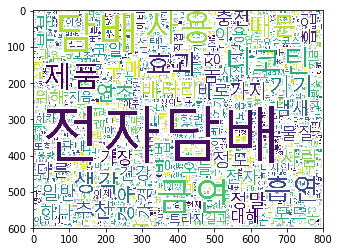

In [15]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()

w1 = w1.to_file(openFileName+'.png')